# Algoritmo de Deutsch-Jozsa

Por: Sergio Tello Lee - 2022

Para darle sentido al trabajo con este algoritmo te invito a que te dividas en 2 personas totalmente independientes la una de la otra, vamos a usar un código de color para cada personalidad: 



<p style="background-color:black; color:orangered; padding:20px"> Primero actuarás como la villana o el villano intergaláctico <span style="font-size:30px">  &#128127;</span>  que creará un oráculo con una función de tipo misterioso (constante o balanceada) para retar a tu otra personalidad. (El reto consiste en que si no eres capaz de determinar en 1 uso del oráculo el tipo de la función, el oráculo explotará acabando con tu amado planeta). </p>

<p style="background-color:lightcyan; color:darkblue; padding:20px"> Finalmente actuarás como la heroína o el héroe <span style="font-size:30px"> &#128526;</span>  que a través del uso de la computación cuántica salvará a su planeta de la destrucción. </p>

¿Comenzamos?

<p style="background-color:black; color:orangered; padding:20px"> 
<span style="font-size:30px">  &#128127;</span>
—Voy a crear un oráculo que contenga una función $f:\{0, 1\}^3 \longrightarrow \{0, 1\}$. Las cadenas que quiero que tomen valor 1 son: 000, 101, 110 y 111. La otra mitad tomará valor 0. ¡Mua, jua, jua! Ahora usaré Qiskit para crear el circuito y el oráculo correspondiente...
</p>

In [1]:
from qiskit import QuantumCircuit

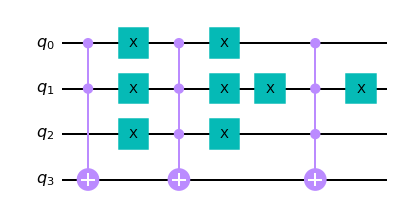

In [2]:
c = QuantumCircuit(4)
c.ccx(0, 1, 3)
c.x([0, 1, 2])
c.mct([0, 1, 2], 3)
c.x([0, 1, 2])
c.x(1)
c.mct([0, 1, 2], 3)
c.x(1)
c.draw(output='mpl')

<p style="background-color:black; color:orangered; padding:20px"> 
<span style="font-size:30px">  &#128127;</span>
—Ahora te voy a dejar dos tareas... ¡Sí, te hablo a ti! Primero debes determinar el costo del circuito de arriba. Esta parte es muy fácil. Luego deberás determinar el costo del circuito que te muestro aquí abajo como una imagen, verás que el costo se ha reducido... ¡Increíble! ¿Alguna vez lo soñaste? El reto es que descifres por qué los circuitos son equivalentes, ¿lo conseguirás?  
</p>

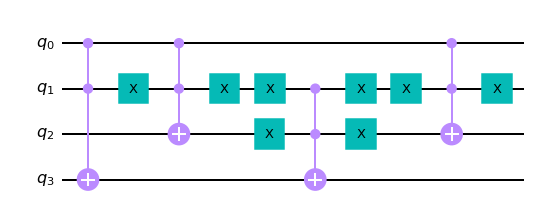

<p style="background-color:black; color:orangered; padding:20px"> 
<span style="font-size:30px">  &#128127;</span>
—Para crear este circuito usé mis más diabólicos poderes matemáticos... ¡Mua, jua, jua, jua! También te dejo este tip: para insertar una imagen en tu notebook sólo necesitas crear una celda tipo markdown vacía y arrastrar tu archivo de imagen sobre ella. La imagen quedará incrustada en el archivo ipynb por toda la eternidad... ¡Mua, jua, jua, jua! Pero bueno, no nos distraigamos que tengo una civilización por exterminar.
</p>

In [3]:
orac = c.to_gate()
orac.name = ' Arrivederci! '

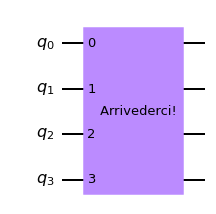

In [4]:
q = QuantumCircuit(4)
q.append(orac, [0, 1, 2, 3])
q.draw(output='mpl')

⏩ Un tiempo después...

<p style="background-color:black; color:orangered; padding:20px"> 
<span style="font-size:30px">  &#128127;</span>
📢 — Desagradables terrícolas, aquí les dejo esta cajita. Deben determinar si contiene una función constante o balanceada. La pueden consultar todas las veces que quieran ¡mua, jua, jua! pero a la segunda vez que la usen el dispositivo explosivo atómico que está dentro explotará y acabará con su planeta ¡mua, jua, jua, jua, jua! Entonces, realmente si quieren sobrevivir deberán darme la respuesta usándola sólo una vez. Arrivederci!
</p>

La gente de la Tierra decía: 😢 *—¡Ay, no, vamos a morir!* 😧 *—¿Qué vamos a hacer? Al menos adivinemos, tenemos 50% de probabilidades de sobrevivir*. Todo era confusión y caos.

Entonces llegas con todos tus poderes de estudiante de la sección 2 de CNYT a salvar el mundo:

<p style="background-color:lightcyan; color:darkblue; padding:20px"> <span style="font-size:30px"> &#128526;</span> —Calma, calma... voy a usar la computación cuántica para resolver este misterio usando ese oráculo sólo una vez. Usaré el algoritmo de Deutsch-Jozsa, ése que funciona gracias a los patrones de las matrices $H^{\otimes n}$ y a la ley de signos. A ver... crearé el circuito... ♪ la, la, la ♪...</p>

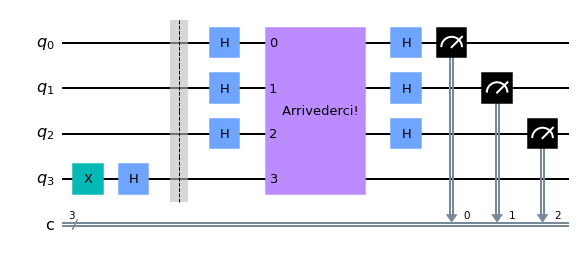

In [5]:
dj = QuantumCircuit(4, 3)
dj.x(3)
dj.h(3)
dj.barrier()
dj.h(range(3)) #¡qué avanzado soy! ;)
dj.append(orac, range(4))
dj.h(range(3))
dj.measure(range(3), range(3))
dj.draw(output='mpl')

In [6]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

<p style="background-color:lightcyan; color:darkblue; padding:20px"> <span style="font-size:30px"> &#128526;</span> —Listo, ahora es sólo cuestión de ejecutarlo 1 vez...</p>

*Nota:* Lo que sucedió realmente es que la ejecución se hizo en un computador cuántico real, robusto y perfectamente confiable. En este notebook haremos la ejecución en el simulador pero usa tu imaginación y reemplázalo por un computador cuántico.

In [7]:
simulador = Aer.get_backend('qasm_simulator')

In [8]:
ejecucion = execute(dj, backend=simulador, shots=1) # Si no ponemos 1 shot... Kaboom!
resultado = ejecucion.result()
conteos = resultado.get_counts()

<p style="background-color:lightcyan; color:darkblue; padding:20px"> <span style="font-size:30px"> &#128526;</span> —¡Qué nerviooooos!</p>

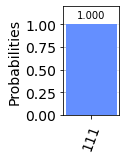

In [9]:
plot_histogram(conteos, figsize=(1,2)) # ¡Qué pro, un histograma pequeñito! ;)

<p style="background-color:lightcyan; color:darkblue; padding:20px"> <span style="font-size:30px"> &#128526;</span> —¡Excelente! No es la cadena 000 (es decir, no se obtuvo como resultado de la medición el ket $|000\rangle$). Eso quiere decir que la función no es constante, así que ¡es balanceada! ¡Estamos salvados!</p>

*Nota:* Cuando el personaje dice *«estamos salvados»* quiere decir que nuestra supervivencia o destrucción vuelve a estar únicamente en nuestras manos.

<p style="background-color:black; color:orangered; padding:20px"> 
<span style="font-size:30px">  &#128127;</span>
—Muestre, a ver, ¿qué les dio?
</p>

<p style="background-color:lightcyan; color:darkblue; padding:20px"> <span style="font-size:30px"> &#128526;</span> —La función es balanceada señor don villano, tome llévese su caja...</p>

<p style="background-color:black; color:orangered; padding:20px"> 
<span style="font-size:30px">  &#128127;</span>
—Rayos... Han ganado esta batalla pero no la guerra, ¡Volveré! ¡Mua, jua, jua, jua, jua! Tan chiquitos y ya saben computación cuántica... hmmm...
</p>

<p style="background-color:lightcyan; color:darkblue; padding:20px"> <span style="font-size:30px"> &#128526;</span> —¡Lo he logrado! Mira, toda la gente que viene a agradecerme... 📱 ¿Aló? Hello? Yes, Mr. President. It has been a pleasure and an honour for me... Wait, what?</p>

<p style="background-color:lightcyan; color:darkblue; padding:20px"> <span style="font-size:30px"> &#128563;</span> —Allá viene corriendo mi c r u s h 💕 Me voy a desmayar, no lo puedo creeeeeer...</p>

⏰ ¡BEEEP! ¡BEEEP! ¡BEEEP!

<p style="background-color:lightcyan; color:darkblue; padding:20px"> <span style="font-size:30px"> &#128534;</span> —Ay, noooo... Todo fue un sueño y voy a llegar tarde a clase de 7...</p>

*Continuará...*